In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from  sklearn.model_selection import train_test_split

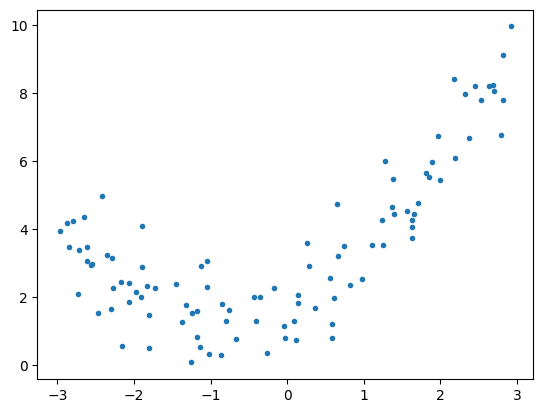

In [2]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X,y, ".")
plt.show()

**Task-1:** Bias and variance

1. Randomly split the data into training (80%) and testing(20%) sets.
2. Randomly select 80% data from the training set to train a model, then calculate test MSE. Repeat it 100 times. 
3. Perform (2) for 1-degree to 10-degree polynomial regression models.
4. Plot test MSEs vs models

In [18]:
from sklearn.model_selection import KFold, cross_val_score
from collections import defaultdict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Storing MSE results
degrees = list(range(1,11))
test_mses = np.zeros((100, len(degrees)))

for i in range(len(degrees)):
    d = degrees[i]

    poly_features = PolynomialFeatures(degree=d, include_bias=False)

    # Selecting 80% of the training data randomly
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    for j in  range(100):

        x_train_2, _, y_train_2, _ = train_test_split(x_train, y_train, test_size=0.2)

        X_train_2_poly = poly_features.fit_transform(x_train_2)
        x_test_poly = poly_features.transform(x_test)

        # Train the model
        lin_reg = LinearRegression()

        lin_reg.fit(X_train_2_poly, y_train_2)

        # Test MSE
        y_test_pred = lin_reg.predict(x_test_poly)
        test_mse = mean_squared_error(y_test, y_test_pred)

        test_mses[j, i] = test_mse




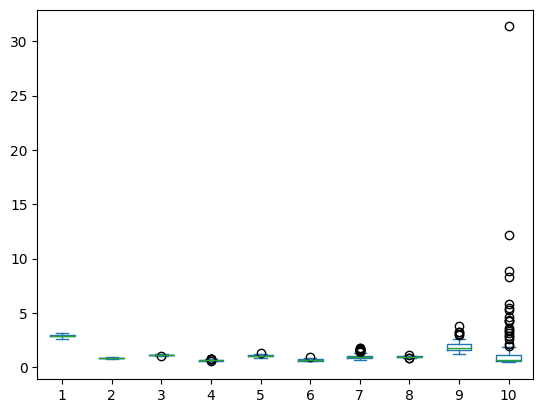

In [34]:
test_mses_df = pd.DataFrame(test_mses)
test_mses_df.plot.box()
plt.xticks(ticks=degrees, labels=[str(i) for i in degrees])
plt.show()

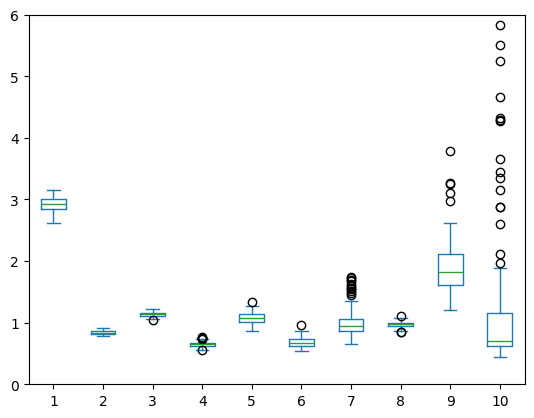

In [ ]:
test_mses_df.plot.box(ylim=(0,6))
plt.xticks(ticks=degrees, labels=[str(i) for i in degrees])
plt.show()

**Task-2:** cross-validation
- Use 5-fold cross-validation to select best model from polynomial regression models (1-degree to 10-degree). Please plot mean training mse and mean validation mse.

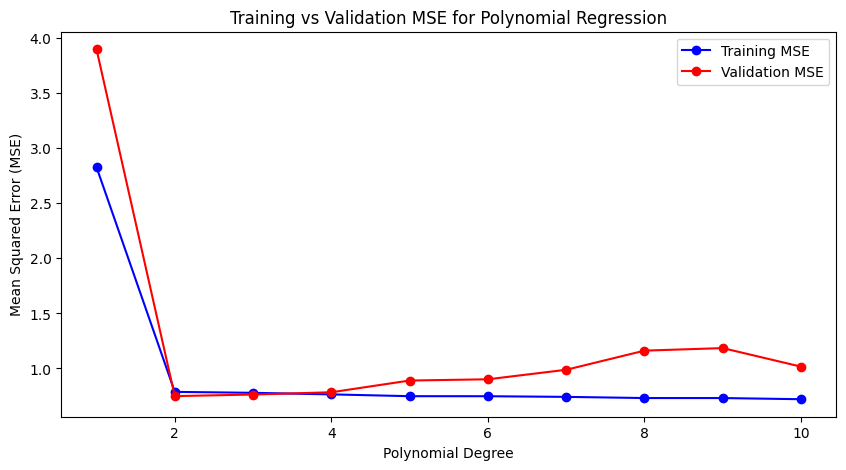

In [ ]:
train_mse = []
val_mse = []

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state= 2025)
    
for d in degrees:
    poly_features = PolynomialFeatures(degree=d, include_bias=False)
    X_trian_poly = poly_features.fit_transform(X_train) # Transform X_train into polynomial features

    lin_reg = LinearRegression()

    # training  MSE
    lin_reg.fit(X_trian_poly, y_train)
    y_train_pred = lin_reg.predict(X_trian_poly)
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    
    # Compute mean validation MSE
    X_val_poly = poly_features.transform(X_val)
    y_val_pred = lin_reg.predict(X_val_poly)
    mean_val_mse = mean_squared_error(y_val, y_val_pred)
    val_mse.append(mean_val_mse)


# Plot results
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_mse, 'bo-', label="Training MSE")
plt.plot(degrees, val_mse, 'ro-', label="Validation MSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training vs Validation MSE for Polynomial Regression")
plt.legend()
plt.show()

**Task-3:** LASSO
1. Randomly split the data into training (80%) and testing(20%) sets.
2. Fit LASSO regression for 10th-degress polynomial model tuning parameter $\alpha=0.3$. Then, calculate the testing RMSE. Can the LASSO model help select variables?
3. Use grid search to choose the best $\alpha$ value (You may need multiply grid searches). Use the LASSO model the best $alpha$ value to calculate the testing RMSE. 

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

preprocess_pipeline = make_pipeline(
    PolynomialFeatures(degree=10, include_bias= False),
    StandardScaler()
)

X_train_poly_std = preprocess_pipeline.fit_transform(x_train)
x_test_poly_std = preprocess_pipeline.transform(x_test)

In [38]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.3, max_iter= 10000)

lasso.fit(X_train_poly_std, y_train)

y_pred = lasso.predict(x_test_poly_std)

#RMSE
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse
lasso.coef_

array([1.32872983, 1.11001322, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [40]:
from sklearn.model_selection import GridSearchCV

params = {"alpha": np.linspace(0.01, 0.2, 100)} 

grid_ridge = GridSearchCV(lasso, params, cv =5)

grid_ridge.fit(X_train_poly_std, y_train)

best_alpha = grid_ridge.best_params_['alpha']
print(f"The best alpha is {best_alpha}")


The best alpha is 0.01191919191919192


In [41]:
lasso = Lasso(alpha = best_alpha, max_iter= 10000)

lasso.fit(X_train_poly_std, y_train)

y_pred = lasso.predict(x_test_poly_std)

#RMSE
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Testing RMSE with best alpha:{rmse:.4f}")

Testing RMSE with best alpha:0.9313


**Task-4: Elastic Net with Grid Search**

- Randomly split the data into training (80%) and testing(20%) sets.
- Use grid search to choose the best settings for `alpha` and `l1_ratio` value (You may need multiply grid searches). Use the elastic net model with the best settings to calculate the testing RMSE.

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2025)

preprocess_pipeline = make_pipeline(
    PolynomialFeatures(degree=10, include_bias= False),
    StandardScaler()
)

X_train_poly_std = preprocess_pipeline.fit_transform(x_train)
x_test_poly_std = preprocess_pipeline.transform(x_test)

In [47]:
from sklearn.linear_model import ElasticNet

params = {
    'alpha': np.linspace(0.01, 10, 60),
    'l1_ratio': np.linspace(0.01, 0.99, 50)
}

grid_enet = GridSearchCV(ElasticNet(), params, cv = 5)

grid_enet.fit(X_train_poly_std, y_train)

best_alpha = grid_enet.best_params_['alpha']
best_ratio = grid_enet.best_params_['l1_ratio']

best_alpha, best_ratio

(np.float64(0.01), np.float64(0.53))

In [48]:
y_pred = grid_enet.best_estimator_.predict(x_test_poly_std)
enet_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Testing RMSE with best alpha and best ratio: {rmse: .4f}")

Testing RMSE with best alpha and best ratio:  0.9313
